# Cyclistic Bike Sharing Analysis
#### Google Professional Certificate Case Study

### Introduction
Cyclistic is a bike sharing company launched in 2016 based in Chicago. The company offers flexible pricing to cater to both Casual Riders and Cyclistic Members who pay an annual fee.  Cyclistic Members are believed to be more profitable and the director of marketing believes the company’s future success depends on maximising the number of annual memberships. The analytics marketing team therefore wants to understand how Casual Riders and Members use the bikes differently and use these insights to develop a marketing strategy that will help convert Casual Riders into Members.

### Business Task
This report aims to provide data and recommendations that will help the marketing team design a strategy that targets Casual Riders and converts them into Cyclistic Members. This will be done by analysising how the two groups use the bike sharing service and how their behaviour differs.


### Data Source
Public historical trip data is available from Motivate International Incorporated [here](https://divvy-tripdata.s3.amazonaws.com/index.html) and available under [this licence](https://ride.divvybikes.com/data-license-agreement). This data is reliable as it is public data provided by Cyclistic and the City of Chicago and is the original data source. It is comprehensive, containing relevant data that will help us solve the business task, and is current with data available from December 2022. There are however some issues with missing entries for the station names and ID’s, as well as some missing longitude and latitude values. This will be taken into consideration when performing the analysis.

## Data Cleaning and Manipulation
The data for January 2022 to December 2022 are available from the data source in 12 .csv files, ranging in size from 18mb to 148mb. Due to the large size of the overall dataset, Python was used to clean and manipulate the data. 
The following steps were carried out during the process:



- Concatenate all 12 .csv files into a single data frame.

In [1]:
# import modules
import os
import pandas as pd

# file path of directory containing the csv files for the past 12 months
file_path = "C:\\Users\\richa\\Documents\\Google Certificate Case Study\\2022 Data\\Raw Data\\"

# list all the files in the directory
file_list = os.listdir(file_path)

# concat all csv files in the directory together
df_raw = pd.concat([(pd.read_csv(file_path + f)) for f in file_list], ignore_index=True)

- Check the name of the data frame columns to see what data is contained in the data frame.

In [2]:
df_raw.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

- Check data type of each column.

In [3]:
df_raw.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

- Check the first few rows of the data frame to see more information about what data is available.

In [4]:
df_raw.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


From inspecting the first few rows of the data frame it can be seen that the field `ride_id` is a unique code given to each individual ride, `rideable_type` is the type of bike used, `started_at` and `ended_at` are the time and date that the ride started and ended, `start_station_name` and `end_station_name` give the name of the stations used to start and end the ride, `start_station_id` and `end_station_id` give the stations unique id, `start_lat`, `start_lng`, `end_lat` and `end_lng` give the latitude and longitude of the start and end of the ride and `member casual` indicates whether the rider was a Casual Rider or a Cyclistic Member. 

- Count the number of entries in each field.

In [5]:
df_raw.count()

ride_id               5667717
rideable_type         5667717
started_at            5667717
ended_at              5667717
start_station_name    4834653
start_station_id      4834653
end_station_name      4774975
end_station_id        4774975
start_lat             5667717
start_lng             5667717
end_lat               5661859
end_lng               5661859
member_casual         5667717
dtype: int64

- Count the number of entries missing in each field.

In [6]:
df_raw.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

- Count the number of records that contain a missing value.

In [7]:
print("number of rows with missing values: ", df_raw['ride_id'].count() - df_raw.dropna()['ride_id'].count())

number of rows with missing values:  1298357


- Check whether the data frame includes any duplicate entries and whether there are any duplicate values in `ride_id`.

In [8]:
# check for duplicate rows and id's
print("number of duplicate rows: ", df_raw.duplicated().sum())
print("number of duplicate ride id's: ", df_raw['ride_id'].duplicated().sum())

number of duplicate rows:  0
number of duplicate ride id's:  0


- Check that all `started_at` and `ended_at` columns have dates in the correct format and change data type from object to datetime64.

In [ ]:
df_raw['started_at'] = pd.to_datetime(df_raw['started_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df_raw['ended_at'] = pd.to_datetime(df_raw['ended_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')

- Add columns containing the start journey month, day of the week, hour and the trip duration in minutes.

In [ ]:
# add month column
df_raw['month'] = df_raw['started_at'].dt.month_name()
# add day of the week column
df_raw['day_of_the_week'] = df_raw['started_at'].dt.day_name()
# add hour column
df_raw['hour'] = df_raw['started_at'].dt.hour
# add trip duration
df_raw['trip_duration_minutes'] = ((df_raw['ended_at'] - df_raw['started_at']).astype('timedelta64[s]') / 60).round(2)

- Check for any outliers that have trip durations of zero or less and remove the records containing them.

In [ ]:
print("number of rides with a trip duration of 0 minutes or less: ",df_raw[df_raw['trip_duration_minutes'] <= 0]['ride_id'].count())
df_raw = df_raw[df_raw['trip_duration_minutes'] > 0]

- Add a column containing the overall journey by concatenating the start station and end station names.

In [ ]:
# add journey column
df_raw['journey'] = df_raw['start_station_name'] + " to " + df_raw['end_station_name']

- Add columns containing the start and end co-ordinates by concatenating the longitude and latitude values.

In [ ]:
# add start coordinates column
df_raw['start_coordinates'] = df_raw['start_lat'].apply(str) + ", " + df_raw['start_lng'].apply(str)
# add end coordinates column
df_raw['end_coordinates'] = df_raw['end_lat'].apply(str) + ", " + df_raw['end_lng'].apply(str)

### Further analysis of missing values

As such a significant number of values are missing values for the `start_station_name` and `end_station_name` we will analyse the records with missing values to see if there is a pattern and if the missing entries can be filled.

First we will check how many of the rows with a missing start station name have the same starting coordinates.

In [ ]:
df_raw[df_raw['start_station_name'].isna()]['start_coordinates'].value_counts().sort_values(ascending=False).head(10)

A large number of entries have the same starting coordinates and this could have significant impact when trying to see which are the most used stations. However, the coordinates for missing stations appear to have a very low precision compared to the other values. Let's confirm this by checking the average length of the start lattitudes for the missing data and the data overall.

In [ ]:
print("average length of latitude for missing values: ", df_raw[df_raw['start_station_name'].isna()]['start_lat'].apply(str).apply(len).mean())
print("average length of latitude for all values: ", df_raw['start_lat'].apply(str).apply(len).mean())

This confirms that the latitude of the missing values have a much lower precision, and therefore more rides will appear to start at the location. This lower precision may be linked to the issue causing the bike to be unable to detect which station it is at and it may be useful to look into further.

To see if the starting location of the bike is linked to the missing data we could check the average longitude and latitude of the missing data and compare it to the average longitude and latitude of the overall data. 

In [ ]:
print(f"average latitude and longitude of missing values: {df_raw[df_raw['start_station_name'].isna()]['start_lat'].mean()}, {df_raw[df_raw['start_station_name'].isna()]['start_lng'].mean()}")
print(f"average latitude and longitude of all values: {df_raw['start_lat'].mean()}, {df_raw['start_lng'].mean()}")
print(f"standard deviation of latitude and longitude of missing values: {df_raw[df_raw['start_station_name'].isna()]['start_lat'].std()}, {df_raw[df_raw['start_station_name'].isna()]['start_lng'].std()}")
print(f"standard deviation latitude and longitude of all values: {df_raw['start_lat'].std()}, {df_raw['start_lng'].std()}")

These values are very close so it is not obvious that location is a contributing factor.

Another area that could be explored is the average trip duration, and whether there are more `end_station_name` entries missing after long journeys.

In [ ]:
print("average trip duration for missing values :", df_raw[df_raw['end_station_name'].isna()]['trip_duration_minutes'].mean())
print("average trip duration for all values :", df_raw['trip_duration_minutes'].mean())
print("median trip duration for missing values :", df_raw[df_raw['end_station_name'].isna()]['trip_duration_minutes'].median())
print("median trip duration for all values :", df_raw['trip_duration_minutes'].median())

The average duration is much higher for the missing values, indicating that there are alot of outliers and very long trips skewing the mean. However, the medians are much closer, with the median length for the missing values being slightly shorter. It could be looked into further whether using bikes for long journeys impacts the accuracy of the bikes location sensors.

The month, day of the week and time of day could also show a pattern for the missing values. As months and days of the week are ordinal, a mean day and month will be calculated to compare the missing data to the rest of the data.

In [ ]:
# average time of day of start for missing values compared to all values
print("average starting time for missing values :", df_raw[df_raw['start_station_name'].isna()]['hour'].mean())
print("average starting time for all values :", df_raw['hour'].mean())
print("average month for missing values :", pd.to_datetime(df_raw[df_raw['start_station_name'].isna()]['started_at']).dt.month.mean())
print("average month for all values :", pd.to_datetime(df_raw['started_at']).dt.month.mean())
print("average day of the week for missing values :", pd.to_datetime(df_raw[df_raw['start_station_name'].isna()]['started_at']).dt.dayofweek.mean())
print("average day of the week for all values :", pd.to_datetime(df_raw['started_at']).dt.dayofweek.mean())

It appears that the rides missing data occured at similar times to the rest of the rides and there is no obvious pattern.

The type of bike could also be linked to the missing values.

In [ ]:
# types of bikes with missing start stations
print("number of rides using each bike in missing entries: ", df_raw[df_raw['start_station_name'].isna()]['rideable_type'].value_counts())

All of the missing values occured when users were using electric bikes. This may be something that could be looked into to see if there is a technical fault with some of the electrc bikes.

We may be able to fill in some of the missing station names by using the coordinates. First we will make a dataframe of unique station names and coordinates.

In [ ]:
# df of start station names and coordinates
start_stations_df = pd.DataFrame()
start_stations_df = df_raw[['start_station_name', 'start_coordinates', 'start_lat', 'start_lng']]
start_stations_df = start_stations_df.rename(columns={'start_station_name': 'station_name', 'start_coordinates': 'coordinates', 'start_lat': 'latitude', 'start_lng': ' longitude'})

# df of end station names and coordinates
end_stations_df = pd.DataFrame()
end_stations_df = df_raw[['end_station_name', 'end_coordinates', 'end_lat', 'end_lng']]
end_stations_df = end_stations_df.rename(columns={'end_station_name': 'station_name', 'end_coordinates': 'coordinates', 'end_lat': 'latitude', 'end_lng': ' longitude'})

# concat the two dfs
stations_df = pd.DataFrame()
stations_df = pd.concat([start_stations_df, end_stations_df])

# drop duplicates to leave only unique coordinate station combinations
stations_df = stations_df.drop_duplicates()

# drop missing stations
stations_df = stations_df.dropna()

# count number of unique station and coordinate combinations
print("number of station coordinate combinations: ", stations_df['station_name'].count())

# number of unique station names
print("number of unique station names: ", stations_df['station_name'].drop_duplicates().count())

# number of unique coordinates
print("number of unique coordinates: ", stations_df['coordinates'].drop_duplicates().count())

There appears to be a large number of coordinates recorded compared to 1709 unique station names. This is due to inconsistent precisions being used for the longitude and latitude values as well as some slightly different values being given for the same stations, perhaps sue to some innaccuracy with the bikes geolocation sensors. Due to the co-ordinate values being unreliable, we will not attempt to use them to fill in the missing station names. 1298357 of the datasets 5667717 rows have missing values, and therefore due to the large number of values affected they will still be included in the analysis.

## Casual Rider and Cyclistic Member Behaviour Analysis

To maximise the number of Casual Riders that can be converted into Cyclistic Members it is important to first understand how the two groups use the bicycles.

To establish this, the following questions will be answered:
1. When do the two groups use the bikes?
2. How long do the two groups ride the bikes for?
3. Where do the two groups start and end their rides?
4. What type of bikes do the two groups use?

We will first look into when the two groups use the bikes. The line graph below shows the number of rides each month for 2022. The number of times a Casual Rider used a bike is shown by the blue line and the number of times a Cyclistic Member used the bikes is shown by the orange line.

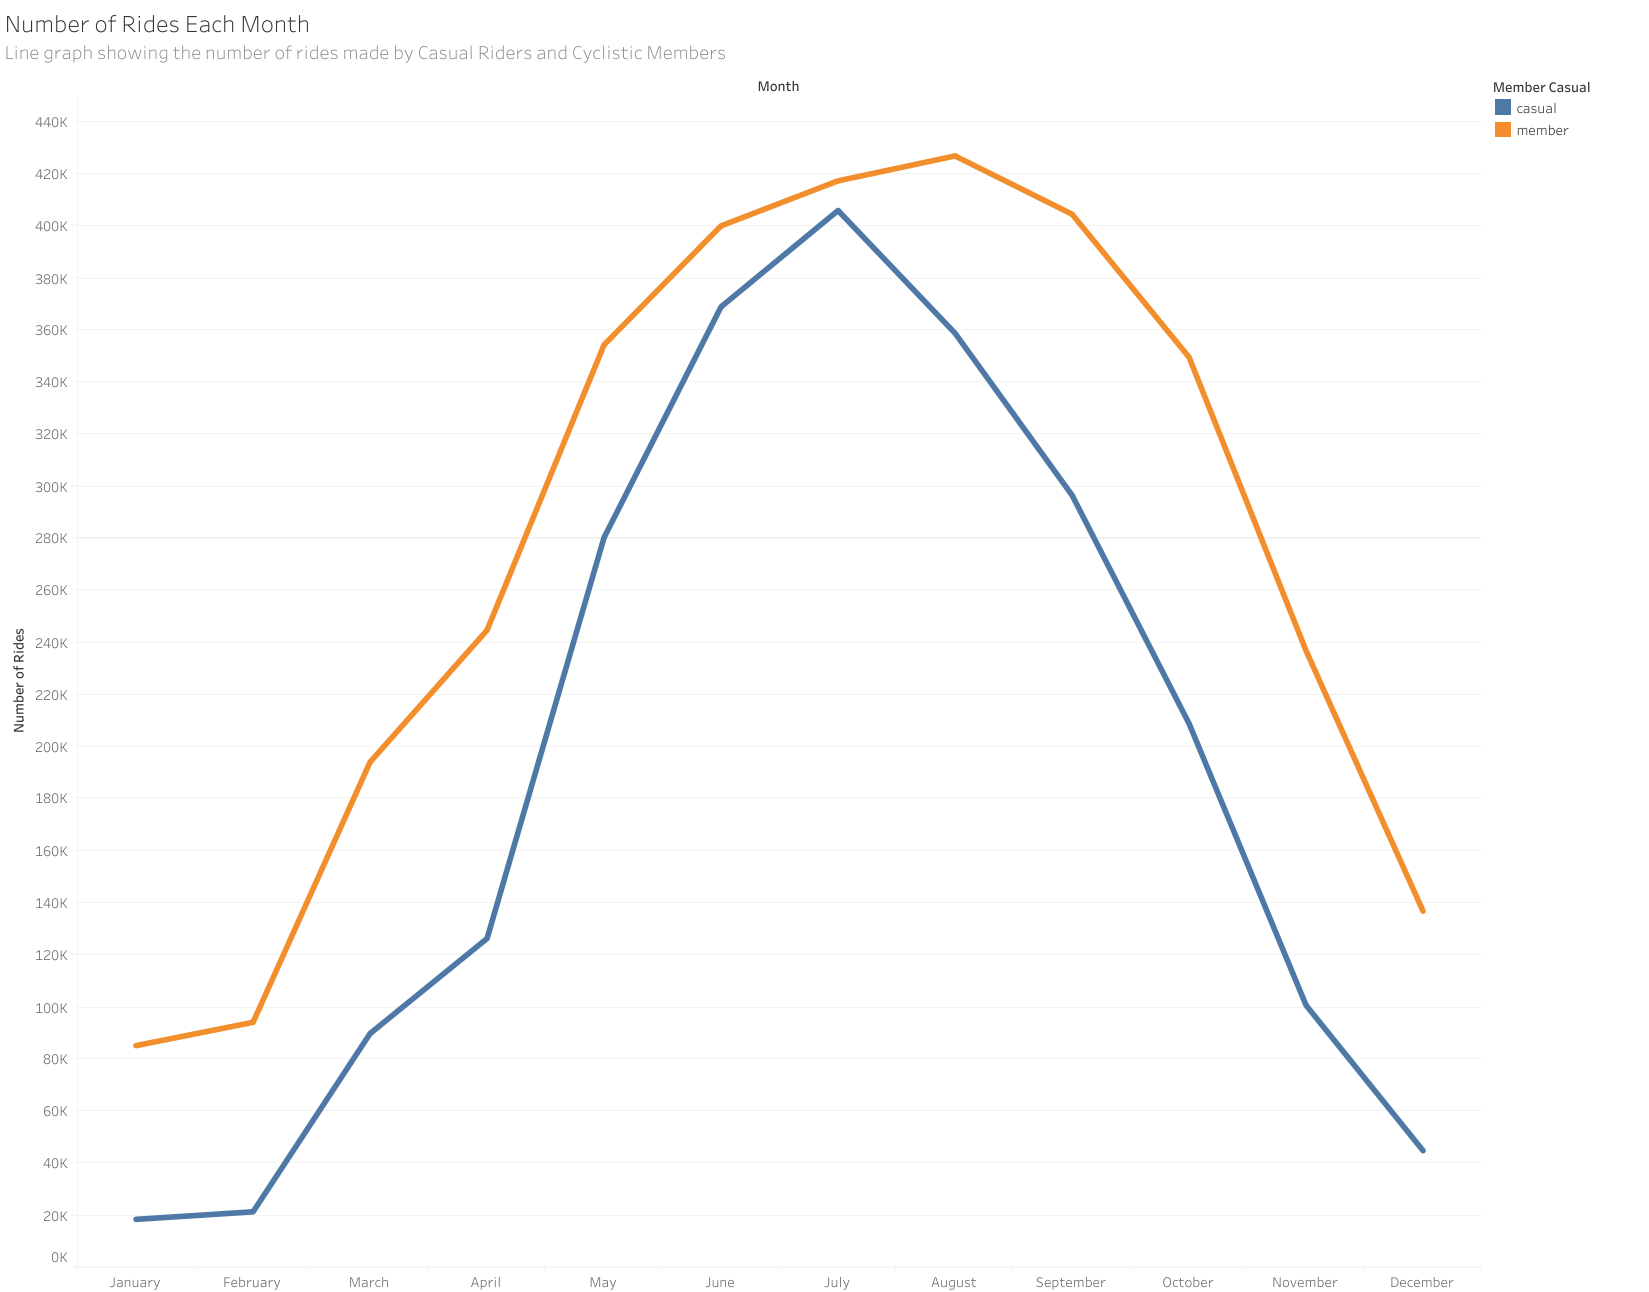

Casual riders and Cyclistic members a very similar trend over the course of the year. The number of casual rides is lowest in January at around 18000 and then steadily increases each month until peaking at around 406000 in July. It then decreases steadily each month until reaching around 45000 in December.

For Cyclistic Members the lowest number of rides is in January at 85000, increases steadily each month until peaking in August at 427000, before steadily decreasing until reaching 137000 in December.

The number of rides each month as expected follows the seasonal trends in weather such as temperature and daylight hours, with casual riders more likely to use the bikes in the warmer months. 42% of all casual user rides occur in the months June, July and August. Any targeted marketing campaigns should take this into account.


It will also be useful to be aware of the day of the week that riders will use the bikes. The line graph below shows the total number of rides made each day of the week for casual riders in blue and cyclistic members in orange during the months June, July and August.

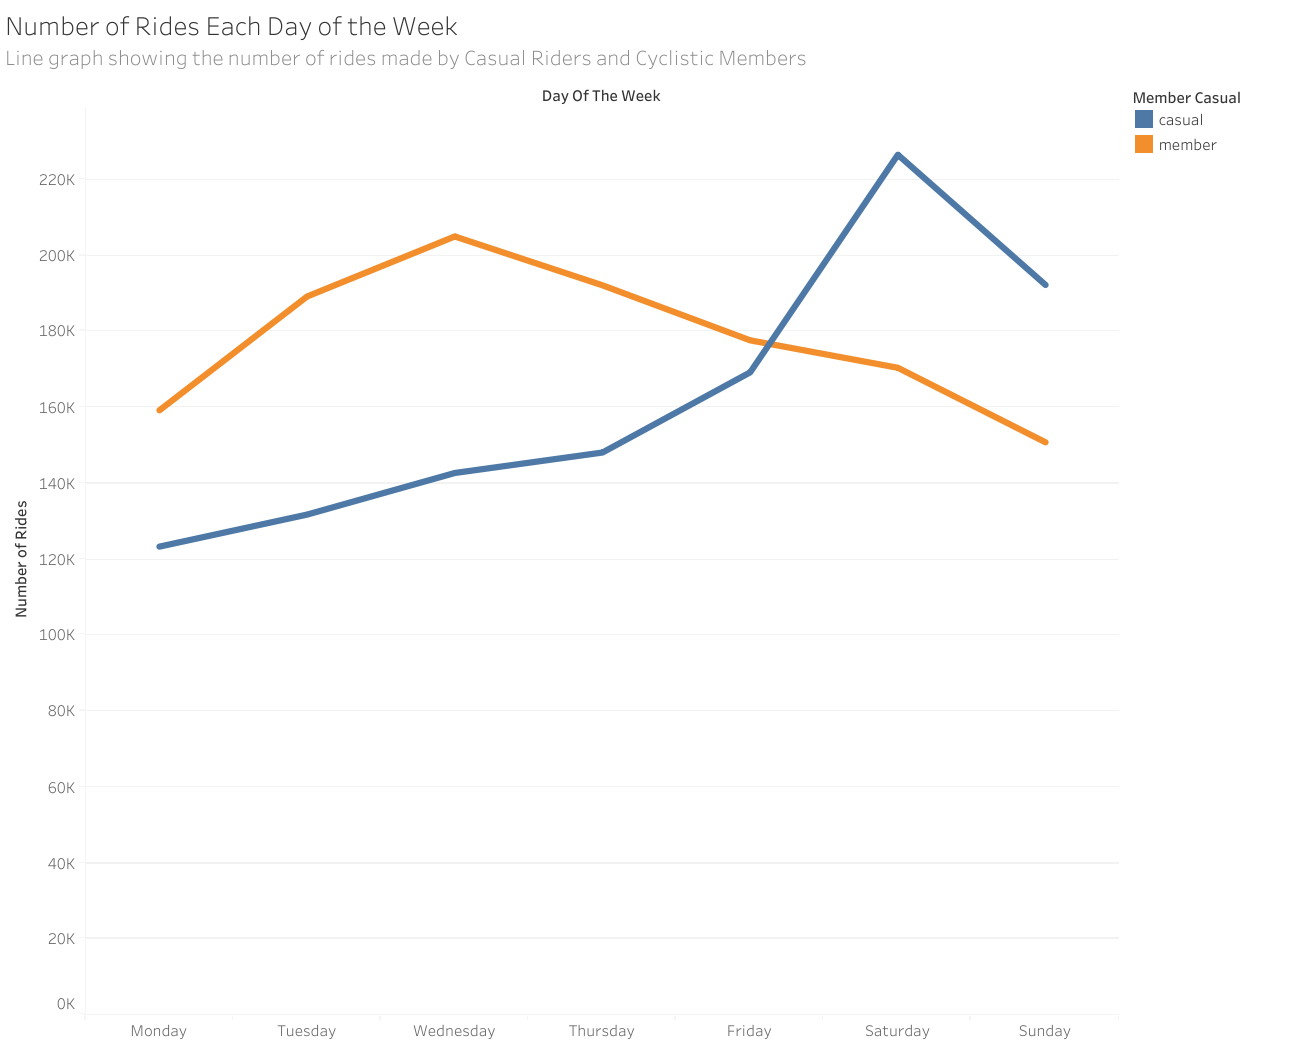

For the months June, July and August casual and cyclistic members follow very different trends. The number of Cyclistic member rides increases from 159000 rides on Monday to 205000 rides on Wednesday where it peaks. It then steadily decreases, reaching its lowest number of rides on Sunday of 151000. 

Casual riders steadily increase from 123000 rides on Monday to 226000 rides on Saturday where it peaks before slightly decreasing to 192000 rides on Sunday.

These trends would support the assumptions that a lot of cyclistic members are using the bikes to commute during the week, where as casual riders are more likely to use the bikes at the weekend as a leisure activity. During the Summer months 44% of casual rider rides occur on Friday, Saturday and Sunday, and it is recommended any marketing campaigns target these days.

It is also important to consider the time of day that riders us the bikes. Below is a line graph showing the total number of rides made during each hour of the day during the months June, July and August. 

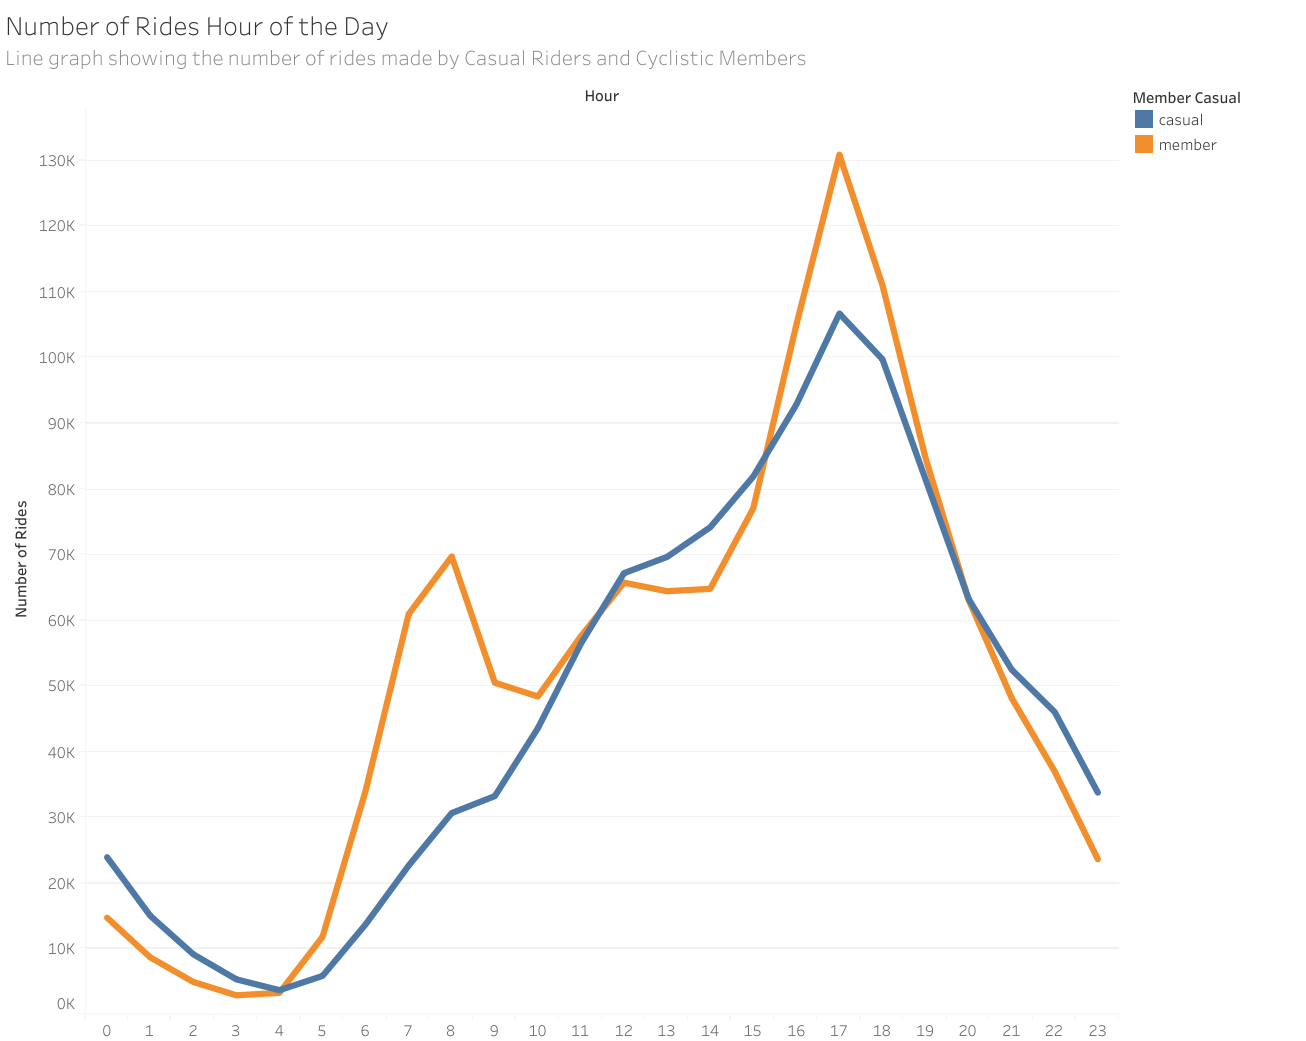

The lowest number of Cyclistic member rides is around 3000 rides at 3am. The number of rides then sharply increases between 6 and 7am, reaching the first peak of 70000 rides at 8am. The number rides then decreases to 48000 at 10am and reaches a second peak of 130000 rides at 5pm. The number of rides then begins to sharply decrease, reaching 24000 rides at 11pm.

The number of casual rides is at its lowest at 4am with 3750 rides and steadily increases throughout the day, peaking at 106000 rides at 5pm. The number of rides each hour then steadily decreases, reaching 34000 rides at 11pm.

The cyclistic member trend again supports the assumption that a lot of users are using the bikes to commute, with the two peaks at 8am and 5pm being typical commute times. Casual riders are a lot more likely to use the bikes in the afternoon, with 40.9% of rides occuring between 3pm and 8pm.

It is useful to also see the times that riders use the bikes specifically at the weekend to see how the behaviour changes from the rest of the week. Below is a line graph showing the number of rides each hour during June, July and August on Saturdays and Sundays only. 

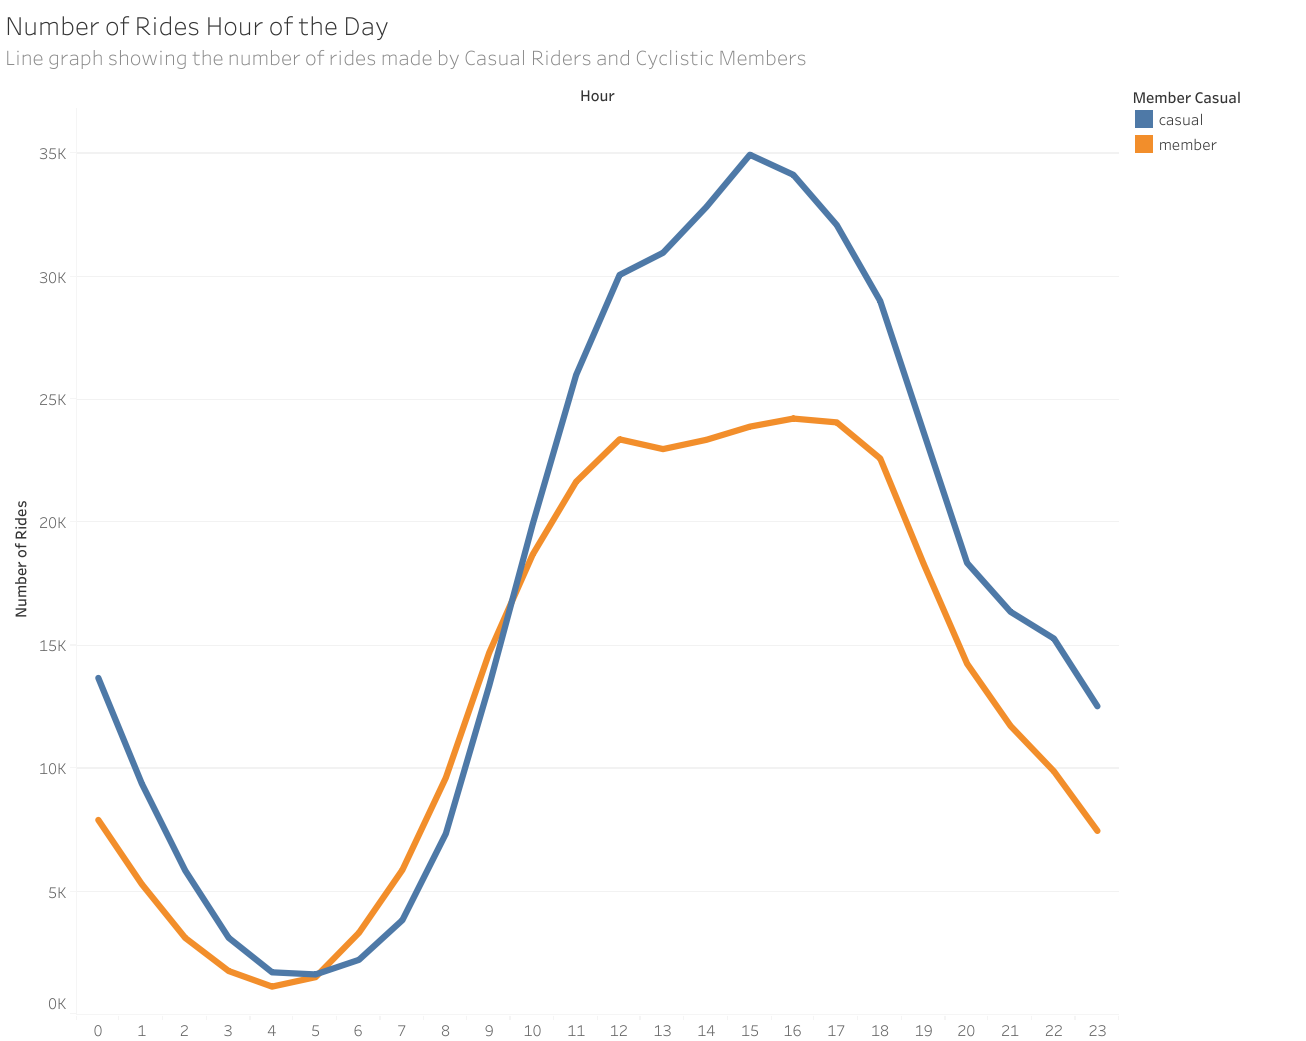

On Saturday and Sunday, for members the lowest number of rides is 4am at 1000 rides. It then sharply increases throughout the morning, reaching 23000 rides at 12pm. The number of rides each hour then stays 23000 until 5pm, where it starts to decrease, reaching 7500 at 11pm.

For casual riders the lowest number of rides is 1500 at 5am. The number of rides then increases throughout the morning and early afternoon, peaking at 35000 rides at 3pm. The number of rides then steadily decreases to 12500 at 11pm.

Compared to the trend for the week overall in the previous graph, the peaks are much wider, with a lot more cyclistis using the bikes in the early afternoon. There is also no longer a peak for member riders at 8am, giving further evidence that the peak was due to users commuting. 64.7% of casual rider rides occur between 11am and 8pm, and this is the suggested time to target marketing strategies on Saturdays and Sundays, as well as 3pm to 8pm on Fridays.

It is also helpful to look at how journey length of the two groups differs. Below is a summary of the central tendancy and dispersion for the trip durations of the two groups.

In [ ]:
print("member trip duration summary:")
print(df_raw[df_raw['member_casual'] == 'member']['trip_duration_minutes'].describe())

In [ ]:
print("casual rider trip duration summary: ")
print(df_raw[df_raw['member_casual']=='casual']['trip_duration_minutes'].describe())

The median trip duration of 13 minutes for casual riders is slightly longer than the median trip duration of 8.8 minutes for members.

The mean trip duration of 29.1 minutes for casual riders is a lot higher than the mean trip duration of 12.7 minutes for cyclistic members. The fact that the mean for the casual riders is so much larger than the median indicates that there are a lot of extreme values in the casual rider trip duration data. There are 4644 trips that lasted longer than 24 hours for casual riders compared to 716 for member rides, and 217 rides that lasted more than 10 days. However it is not clear whether or not these are genuine trips, so these values will remain in the analysis. 

The dispersion of the casual rider trip durations is much larger than the spread of the member trip durations, with a standard deviation of 272.6 compared to 28.8. This again indicates that there are more casual riders taking longer trips.

The fact that casual riders are more likely to take longer trips is another aspect that needs to be taken into consideration when implementing a new marketing strategy.

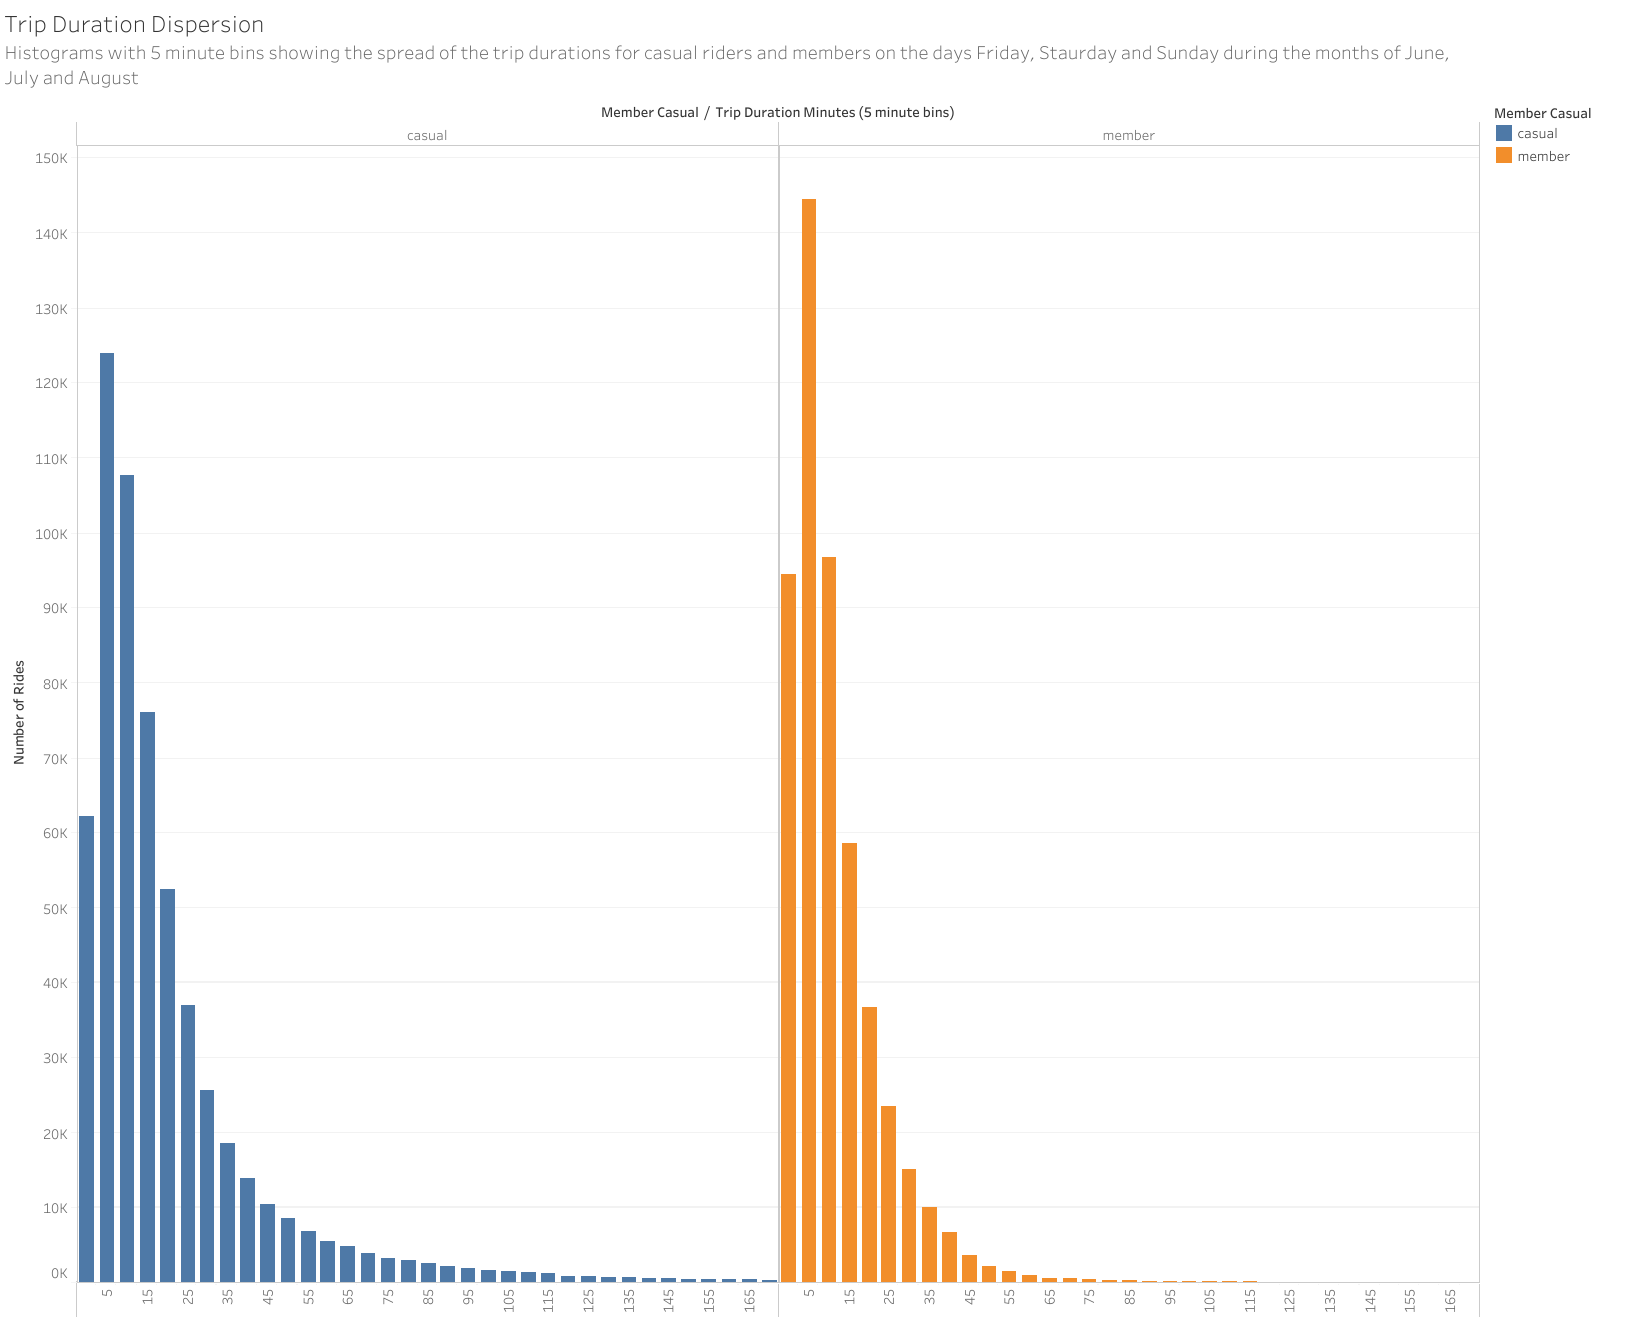

The histogram shows that members are more likely to use the bikes for trips that are less than 10 minutes, but casual riders are more likely to use the bikes for journeys longer than 10 minutes. The x-axis for both histograms stop at 170 minutes for clarity.

Another important area to consider when trying to create a targeted marketing strategy that converts Casual Riders into Cyclistic Members is where the two groups us the bikes. Below shows the locations of the 10 most popular start station locations for Cyclistic Members and Casual Riders.

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1678076996462' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cy&#47;CyclisticCaseStudy_16778648375890&#47;StartStationLocationComparison&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CyclisticCaseStudy_16778648375890&#47;StartStationLocationComparison' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cy&#47;CyclisticCaseStudy_16778648375890&#47;StartStationLocationComparison&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1678076996462');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='1620px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='610px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='1620px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='610px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='750px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

More members journeys start further away from the city centre in residential areas, again indicating that a lot of the members use the bikes to commute.

The most popular casual rider locations are mainly in the city centre and along the coast line. It is reccomended that these are the areas that the marketing strategy targets.

Below are horizontal bar charts showing in more detail which the most popular start stations are for members and Casual Riders.

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1678077269625' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cy&#47;CyclisticCaseStudy_16778648375890&#47;Top10StartStationsforCasualRidersandMembers&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CyclisticCaseStudy_16778648375890&#47;Top10StartStationsforCasualRidersandMembers' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cy&#47;CyclisticCaseStudy_16778648375890&#47;Top10StartStationsforCasualRidersandMembers&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1678077269625');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='1620px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='610px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='1620px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='610px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='750px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Streeter Dr and Grand Ave is by far the most popular start station, with over 58000 rides starting there over the year. Most of the popular Casual Rider start stations are close to the shoreline such as DuSable Lake Shore and attractions such as the theatre on the lake. It is reccommended that these areas are targeted with any marketing strategies in order to get the largest return on investment.

By comparison, the most popular member start stations are more residential areas such as Ellis Ave & 60th as well as stations near a lot of office buildings such as Kingsbury St & Kinzie St.

Another ascpect to be considered is what types of bikes are used by the two groups. Below shows a pie chart for the type of bike that was used during each trip for casual riders on the left and cyclistic members on the right.

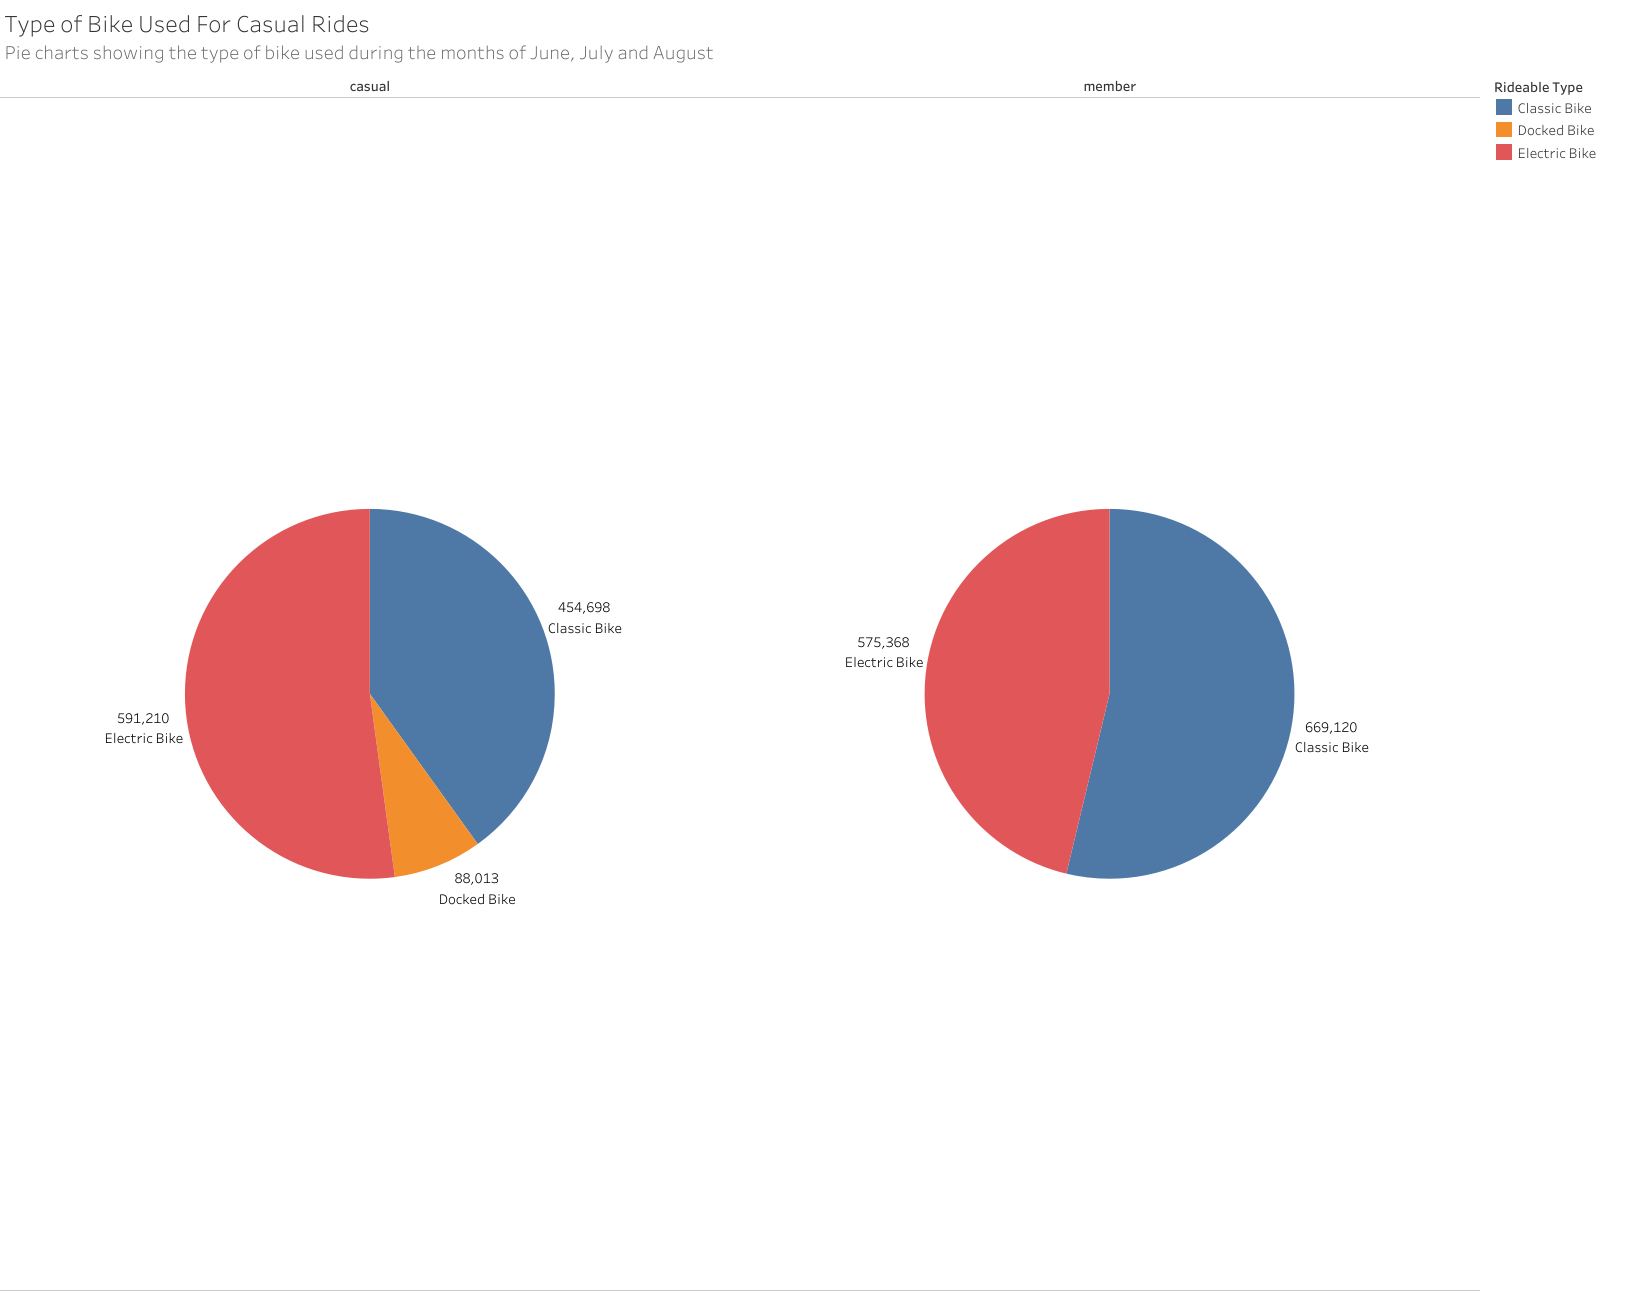

Electric bikes are very popular with casual riders, making up 52.1% of the bikes used compared to 46.2% of member rides. 88000 rides were also made using docked bikes, where as there were no trips made by members using docked bikes. It is unclear what a docked bike is and more reasearch may be needed.

The marketing strategy should make use of casual riders preferences for electric bikes.

## Insights Summary and Reccommendations
These are the key insights found as part of the analysis:
1. Casual riders are more likely to use the bike share service during the months of June, July and August.
2. Casual riders are also most likely to use the service on Fridays, Saturdays and Sundays.
3. Casual riders are more likely to more likely to take longer trips. 75% of casual rider trips are longer than 7.3 minutes.
4. Casual riders are more likely to use the service between 11am and 8pm on Saturdays and Sundays and between 3pm and 8pm on Fridays.
5. Casual riders are more likely to use the electric bike option.
6. Casual riders are more likely to start their journey in the city centre and along the shoreline.

Taking these insights into consideration, the following are the reccomendations:
1. Any promotions should target the Summer months of June, July and August, in particular Friday, Saturday and Sunday afternoons.
2. The most used start station is at Streeter Dr and Grand Ave which is located next to the pier. Collaborating with the local restaurants and attractions to achieve mutual promotion and discounts when commiting to an annual membership would create a win-win situation.
3. Group discounts and family deals to encourage those using the service for leisure to commit to an annual membership to save money.
4. Ensure there are plenty of electric bikes available along the shoreline and at the city centre stations, as these are the most likely type of bike to encourage casual rider use. Being able to provide them reliably will encourage users to commit to an annual membership.
5. Casual riders enjoy long trips. The company could offer an app they gives users rewards if they reach distance targets such as discounts or merchandise.

Thank you for taking the time to read this report.